# Music Recommendation System

In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import ensemble, metrics
import xgboost as xgb
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


In [5]:
df.shape

(1048575, 6)

In [6]:
df = df.sample(frac=0.1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104858 entries, 237484 to 363107
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   msno                104858 non-null  object
 1   song_id             104858 non-null  object
 2   source_system_tab   104537 non-null  object
 3   source_screen_name  100116 non-null  object
 4   source_type         104575 non-null  object
 5   target              104858 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 5.6+ MB


In [8]:
songs = pd.read_csv('songs.csv')
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 7 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   song_id      1048575 non-null  object 
 1   song_length  1048575 non-null  int64  
 2   genre_ids    1011299 non-null  object 
 3   artist_name  1048575 non-null  object 
 4   composer     570554 non-null   object 
 5   lyricist     188366 non-null   object 
 6   language     1048574 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 56.0+ MB


In [9]:
df = pd.merge(df, songs, on='song_id', how='left')
del songs

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104858 entries, 0 to 104857
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   msno                104858 non-null  object 
 1   song_id             104858 non-null  object 
 2   source_system_tab   104537 non-null  object 
 3   source_screen_name  100116 non-null  object 
 4   source_type         104575 non-null  object 
 5   target              104858 non-null  int64  
 6   song_length         86851 non-null   float64
 7   genre_ids           85543 non-null   object 
 8   artist_name         86851 non-null   object 
 9   composer            68259 non-null   object 
 10  lyricist            51109 non-null   object 
 11  language            86850 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 10.4+ MB


In [11]:
members = pd.read_csv('members.csv')
df = pd.merge(df, members, on='msno', how='left')
del members
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104858 entries, 0 to 104857
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   msno                    104858 non-null  object 
 1   song_id                 104858 non-null  object 
 2   source_system_tab       104537 non-null  object 
 3   source_screen_name      100116 non-null  object 
 4   source_type             104575 non-null  object 
 5   target                  104858 non-null  int64  
 6   song_length             86851 non-null   float64
 7   genre_ids               85543 non-null   object 
 8   artist_name             86851 non-null   object 
 9   composer                68259 non-null   object 
 10  lyricist                51109 non-null   object 
 11  language                86850 non-null   float64
 12  city                    104858 non-null  int64  
 13  bd                      104858 non-null  int64  
 14  gender              

In [12]:
for i in df.select_dtypes(include=['object']).columns:
    df[i][df[i].isnull()] = 'unknown'
df = df.fillna(value=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104858 entries, 0 to 104857
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   msno                    104858 non-null  object 
 1   song_id                 104858 non-null  object 
 2   source_system_tab       104858 non-null  object 
 3   source_screen_name      104858 non-null  object 
 4   source_type             104858 non-null  object 
 5   target                  104858 non-null  int64  
 6   song_length             104858 non-null  float64
 7   genre_ids               104858 non-null  object 
 8   artist_name             104858 non-null  object 
 9   composer                104858 non-null  object 
 10  lyricist                104858 non-null  object 
 11  language                104858 non-null  float64
 12  city                    104858 non-null  int64  
 13  bd                      104858 non-null  int64  
 14  gender              

In [13]:
 #Create Dates

# registration_init_time
df.registration_init_time = pd.to_datetime(df.registration_init_time, format='%Y%m%d', errors='ignore')
df['registration_init_time_year'] = df['registration_init_time'].dt.year
df['registration_init_time_month'] = df['registration_init_time'].dt.month
df['registration_init_time_day'] = df['registration_init_time'].dt.day

# expiration_date
df.expiration_date = pd.to_datetime(df.expiration_date,  format='%Y%m%d', errors='ignore')
df['expiration_date_year'] = df['expiration_date'].dt.year
df['expiration_date_month'] = df['expiration_date'].dt.month
df['expiration_date_day'] = df['expiration_date'].dt.day

In [14]:
#Dates to categoty
df['registration_init_time'] = df['registration_init_time'].astype('category')
df['expiration_date'] = df['expiration_date'].astype('category')

In [15]:
# Object data to category
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype('category')
    
# Encoding categorical features
for col in df.select_dtypes(include=['category']).columns:
    df[col] = df[col].cat.codes

In [16]:
df.corr()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,...,gender,registered_via,registration_init_time,expiration_date,registration_init_time_year,registration_init_time_month,registration_init_time_day,expiration_date_year,expiration_date_month,expiration_date_day
msno,1.000000,0.001095,0.016411,-0.005944,-0.012100,0.004164,-0.003744,0.003821,-0.001584,0.007504,...,-0.009824,-0.010242,0.013553,0.031329,0.012501,0.014436,0.012990,0.012958,0.016141,-0.002643
song_id,0.001095,1.000000,0.000385,-0.001252,0.003447,-0.005785,-0.032605,0.043794,-0.016596,-0.018044,...,0.001076,-0.003127,-0.000838,-0.001512,-0.000440,-0.003623,0.007058,-0.000466,-0.002473,0.002802
source_system_tab,0.016411,0.000385,1.000000,-0.054092,-0.099618,0.071241,0.012329,0.010453,0.017905,0.029840,...,-0.010211,0.026657,-0.025695,0.058012,-0.018321,-0.032220,0.017615,0.055247,-0.003539,0.009982
source_screen_name,-0.005944,-0.001252,-0.054092,1.000000,0.364866,-0.071350,0.004197,-0.001501,0.008738,0.006126,...,0.023223,-0.036296,0.040249,-0.046905,0.038071,0.013612,-0.007256,-0.039640,0.003262,-0.001181
source_type,-0.012100,0.003447,-0.099618,0.364866,1.000000,-0.153760,0.002212,-0.018857,-0.011890,-0.009994,...,0.017354,-0.013344,0.013037,-0.041306,0.011015,0.015502,0.002767,-0.042580,0.016138,-0.008332
target,0.004164,-0.005785,0.071241,-0.071350,-0.153760,1.000000,0.004912,-0.004820,0.013645,0.007508,...,-0.008987,0.009258,0.005279,0.090198,0.006803,-0.014085,0.001277,0.080398,-0.019498,0.013951
song_length,-0.003744,-0.032605,0.012329,0.004197,0.002212,0.004912,1.000000,-0.633093,-0.018314,-0.087507,...,-0.005030,0.007995,-0.008028,0.006210,-0.009099,0.003616,-0.004203,0.003947,-0.001422,0.001068
genre_ids,0.003821,0.043794,0.010453,-0.001501,-0.018857,-0.004820,-0.633093,1.000000,0.211749,0.242820,...,0.000368,-0.002836,-0.000247,0.002873,0.000637,-0.002374,0.003491,0.001915,0.007790,0.002013
artist_name,-0.001584,-0.016596,0.017905,0.008738,-0.011890,0.013645,-0.018314,0.211749,1.000000,0.337678,...,0.000178,0.000316,-0.006867,0.012447,-0.008165,0.011526,-0.002963,0.007884,0.003277,0.004805
composer,0.007504,-0.018044,0.029840,0.006126,-0.009994,0.007508,-0.087507,0.242820,0.337678,1.000000,...,-0.000134,0.000728,-0.005258,0.005698,-0.006023,0.000996,-0.002295,0.005672,0.002249,0.004224


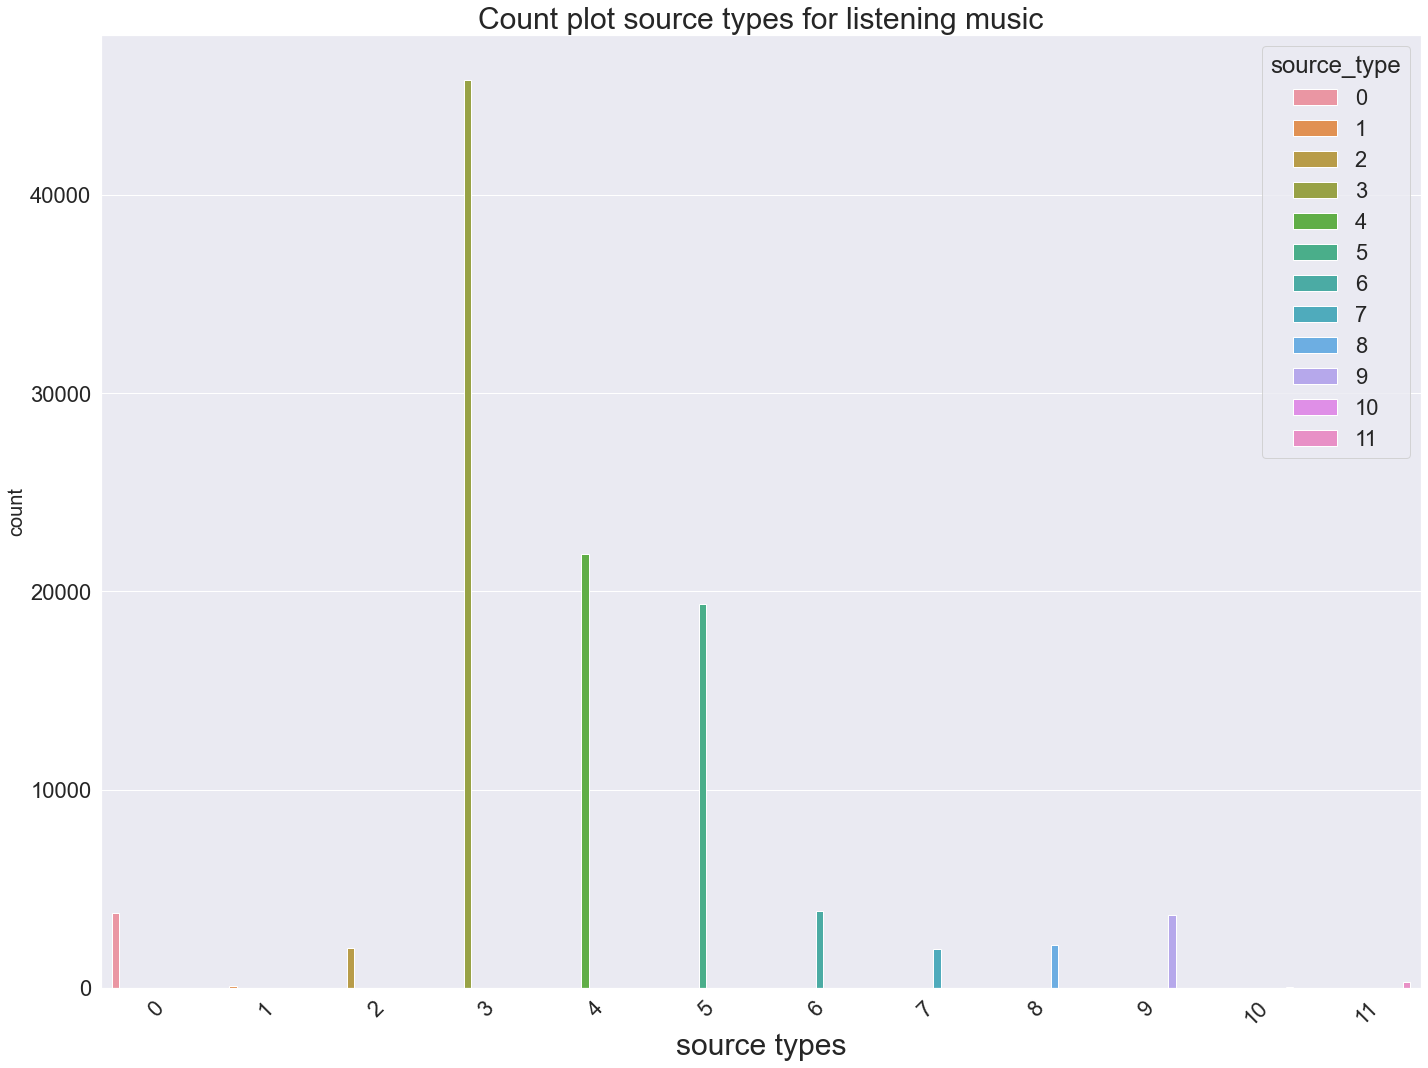

In [17]:
plt.figure(figsize=(20,15))
sns.set(font_scale=2)
sns.countplot(x='source_type',hue='source_type',data=df)
sns.set(style="darkgrid")
plt.xlabel('source types',fontsize=30)
plt.ylabel('count',fontsize=20)
plt.xticks(rotation='45')
plt.title('Count plot source types for listening music',fontsize=30)
plt.tight_layout()

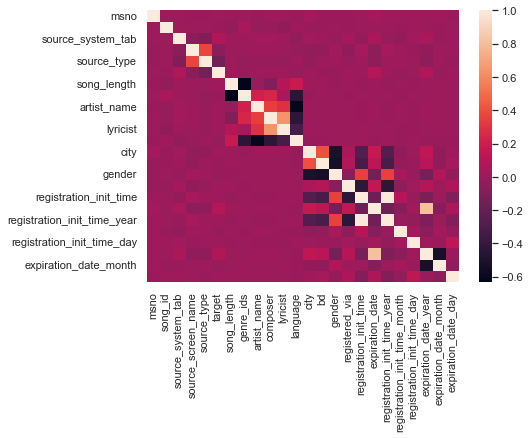

In [18]:
plt.figure(figsize=[7,5])
sns.heatmap(df.corr())
plt.show()

# Random Forest

In [19]:
from sklearn.ensemble import RandomForestRegressor
model = ensemble.RandomForestClassifier(n_estimators=250, max_depth=25)
model.fit(df[df.columns[df.columns != 'target']], df.target)

RandomForestClassifier(max_depth=25, n_estimators=250)

In [20]:
df_plot = pd.DataFrame({'features': df.columns[df.columns != 'target'],
                        'importances': model.feature_importances_})
df_plot = df_plot.sort_values('importances', ascending=False)

In [21]:
members = pd.read_csv('members.csv')

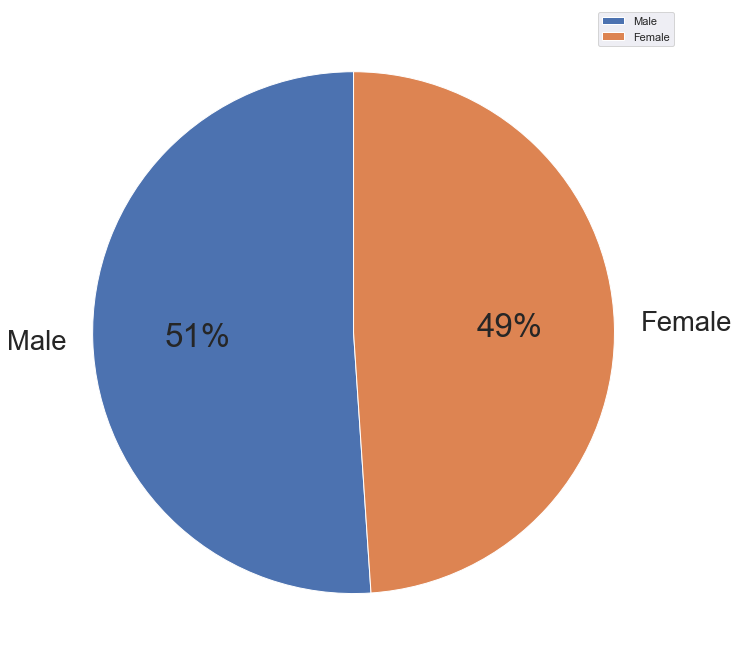

In [22]:
import matplotlib as mpl

mpl.rcParams['font.size'] = 33.0
labels = ['Male','Female']
plt.figure(figsize = (12, 12))
sizes = pd.value_counts(members.gender)
patches, texts, autotexts = plt.pie(sizes, 
                                    labels=labels, autopct='%.0f%%',
                                    shadow=False, radius=1,startangle=90)
for t in texts:
    t.set_size('smaller')
plt.legend()
plt.show()

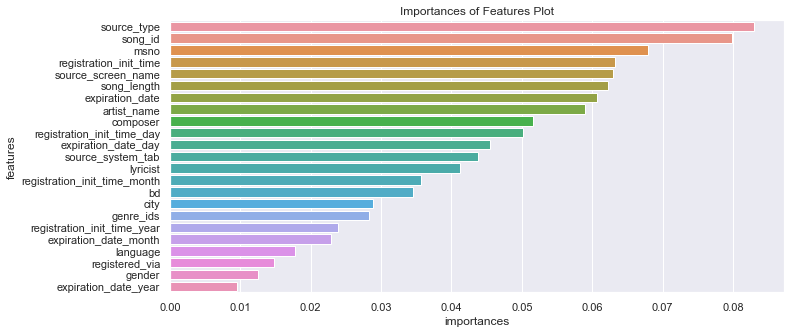

In [23]:
plt.figure(figsize=[11,5])
sns.barplot(x = df_plot.importances, y = df_plot.features)
plt.title('Importances of Features Plot')
plt.show()

In [24]:
model.feature_importances_

array([0.06798199, 0.07987834, 0.04378479, 0.06301943, 0.08303357,
       0.06222332, 0.02823069, 0.05890202, 0.05156312, 0.04123842,
       0.01775717, 0.02884463, 0.03460608, 0.01255712, 0.01474682,
       0.06327608, 0.06068673, 0.02393543, 0.03568291, 0.05016882,
       0.00957166, 0.02288177, 0.04542909])

In [25]:
df = df.drop(df_plot.features[df_plot.importances < 0.04].tolist(), 1)

In [26]:
list(df.columns)

['msno',
 'song_id',
 'source_system_tab',
 'source_screen_name',
 'source_type',
 'target',
 'song_length',
 'artist_name',
 'composer',
 'lyricist',
 'registration_init_time',
 'expiration_date',
 'registration_init_time_day',
 'expiration_date_day']

# XGboost

In [27]:
target = df.pop('target')

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
train_data, test_data, train_labels, test_labels = train_test_split(df, target, test_size = 0.3)
model = xgb.XGBClassifier(learning_rate=0.1, max_depth=15, min_child_weight=5, n_estimators=250)
model.fit(train_data, train_labels)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=15, max_leaves=0, min_child_weight=5, missing=nan,
              monotone_constraints='()', n_estimators=250, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

# Result

In [30]:
predict_labels = model.predict(test_data)
print(metrics.classification_report(test_labels, predict_labels))

              precision    recall  f1-score   support

           0       0.66      0.45      0.53      9679
           1       0.79      0.89      0.84     21779

    accuracy                           0.76     31458
   macro avg       0.72      0.67      0.69     31458
weighted avg       0.75      0.76      0.74     31458



In [31]:
members = pd.read_csv('members.csv')

In [33]:
count=0
for i in members["bd"]:
     if i<=50 and i>=10:
        count+=1
percentage=(count/len(members["bd"]))*100
percentage=("{:.2f}".format(percentage))
print(percentage,"% of user is between 10 and 50")

40.74 % of user is between 10 and 50
